**Step 1: Import Required Libraries**

In [3]:
import pandas as pd       # for data manipulation
import numpy as np        # for numerical operations
import matplotlib.pyplot as plt  # for basic plotting
import seaborn as sns     # for advanced visualizations

# Notebook-friendly plots
%matplotlib inline

# Set seaborn theme
sns.set(style="whitegrid")

**Step 2: Load the Dataset**

In [5]:
df = pd.read_csv("Titanic-Dataset.csv")  
df.head()  # Preview first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 3: Understand the Data Structure**

In [21]:
# Basic info about data types and nulls
df.info()

# Statistical summary (numerical columns)
df.describe()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 61.3+ KB


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Step 4: Data Cleaning**

In [23]:
# Let's drop 'Cabin' (too many missing values), and check how many rows are left
df.drop(columns=['Cabin'], inplace=True)

# Drop rows where 'Age' or 'Embarked' is missing
df.dropna(subset=['Age', 'Embarked'], inplace=True)

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

#counting unique values
print(df.value_counts())

PassengerId  Survived  Pclass  Name                                             Sex     Age    SibSp  Parch  Ticket       Fare      Embarked
1            0         3       Braund, Mr. Owen Harris                          male    22.00  1      0      A/5 21171    7.2500    S           1
622          1         1       Kimball, Mr. Edwin Nelson Jr                     male    42.00  1      0      11753        52.5542   S           1
595          0         2       Chapman, Mr. John Henry                          male    37.00  1      0      SC/AH 29037  26.0000   S           1
596          0         3       Van Impe, Mr. Jean Baptiste                      male    36.00  1      1      345773       24.1500   S           1
598          0         3       Johnson, Mr. Alfred                              male    49.00  0      0      LINE         0.0000    S           1
                                                                                                                                 

**Step 5: Univariate Analysis (One variable at a time)**

Target Variable - Survived

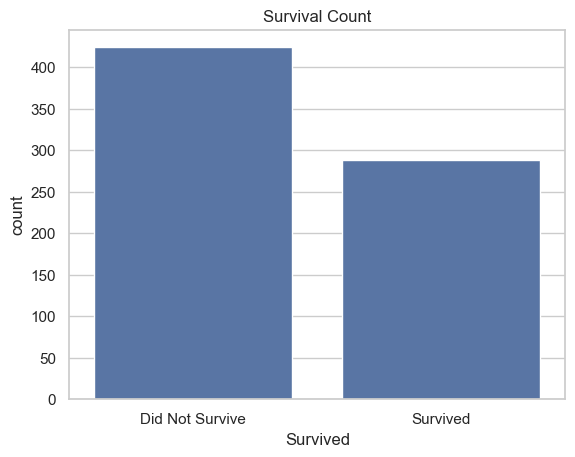

In [8]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

Passenger Class Distribution

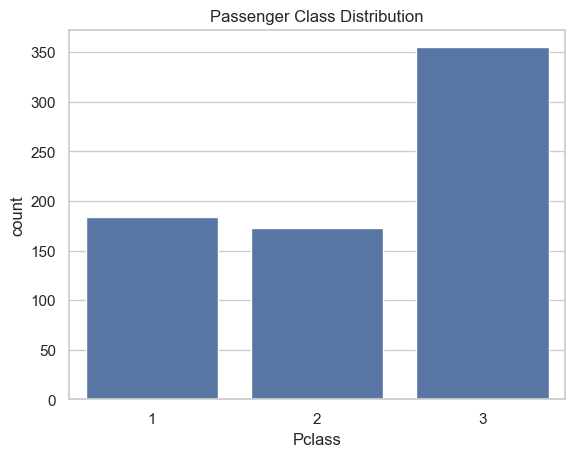

In [9]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

Gender Distribution

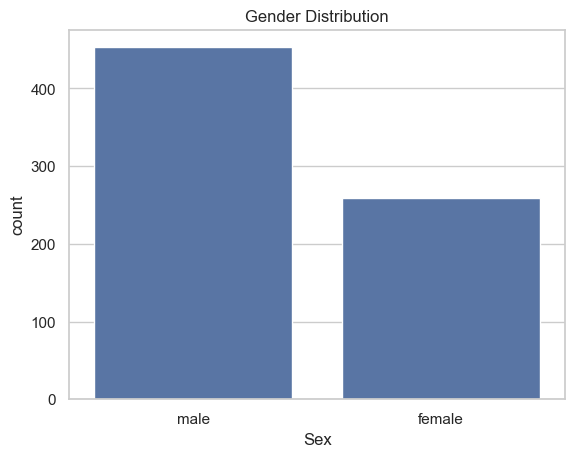

In [10]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

Age Distribution

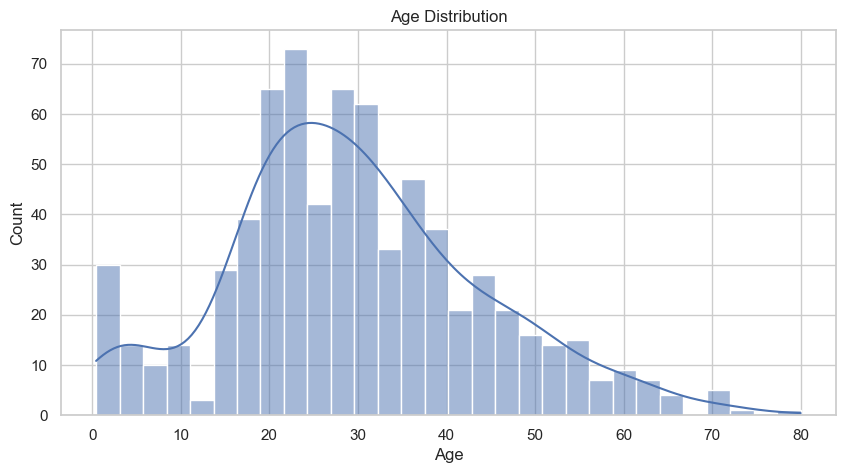

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**Step 6: Bivariate Analysis (Comparing two variables)**

Survival by Gender

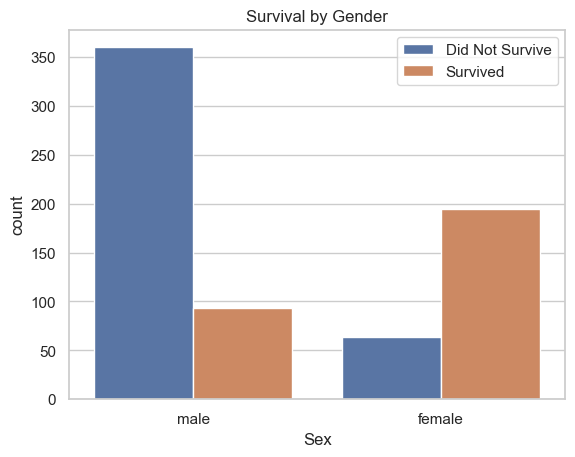

In [12]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

Survival by Passenger Class

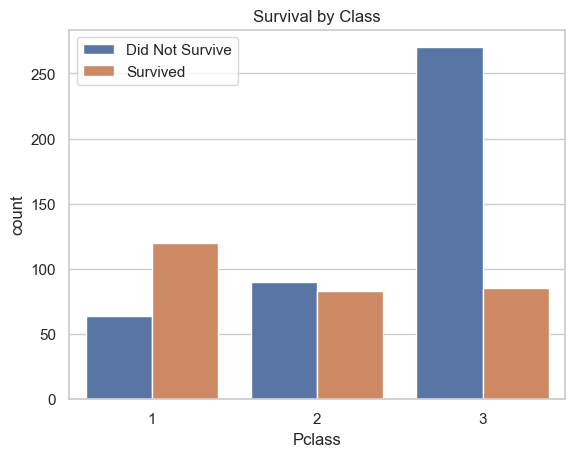

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Class")
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

Age vs Survival (Boxplot)

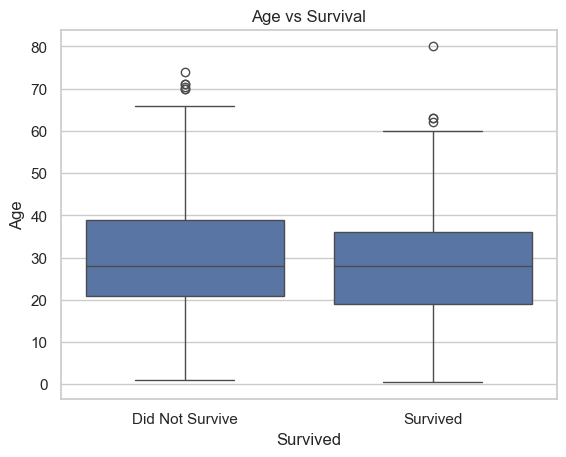

In [14]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

 Fare vs Survival

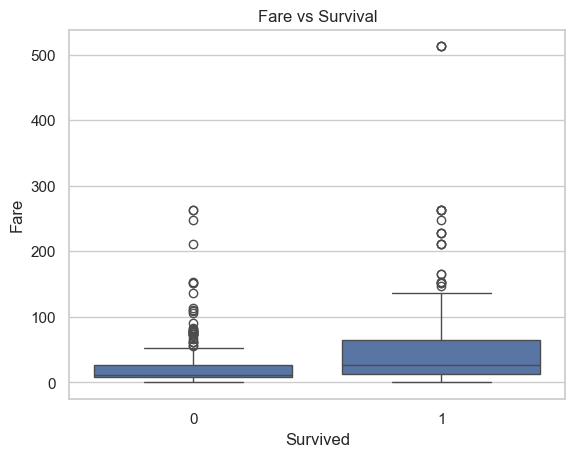

In [15]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

**Step 7: Correlation Heatmap**

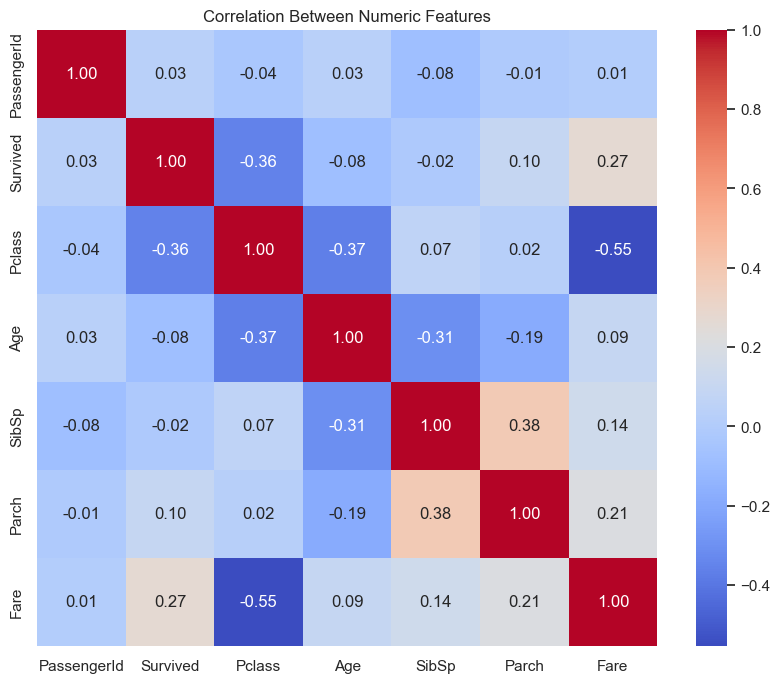

In [16]:
# Only numerical features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

**Step 8: Pairplot (Heavy Plot)**

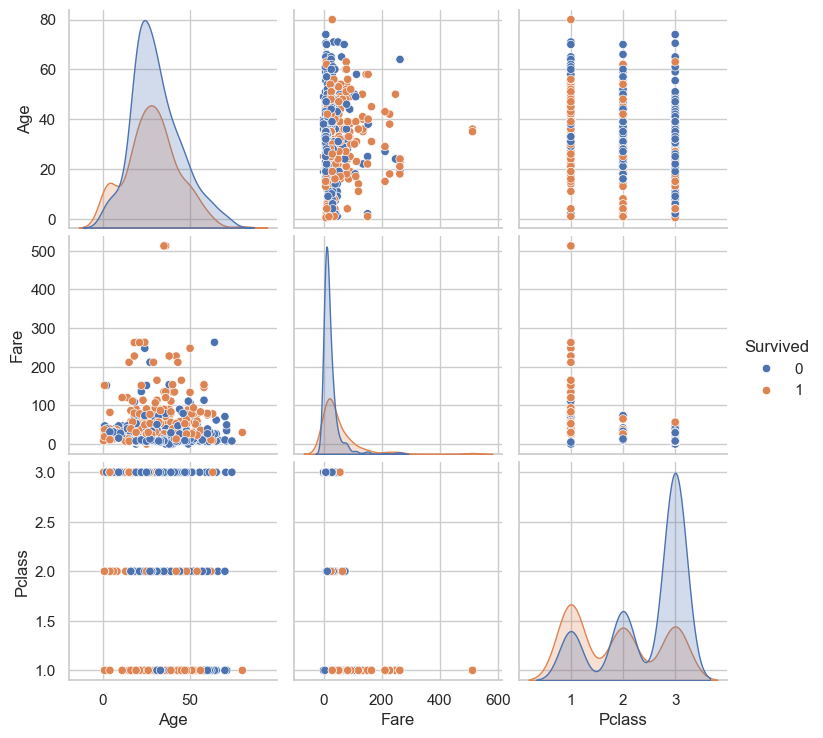

In [17]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

**Step 09 : Plot histograms, boxplots, scatterplots**

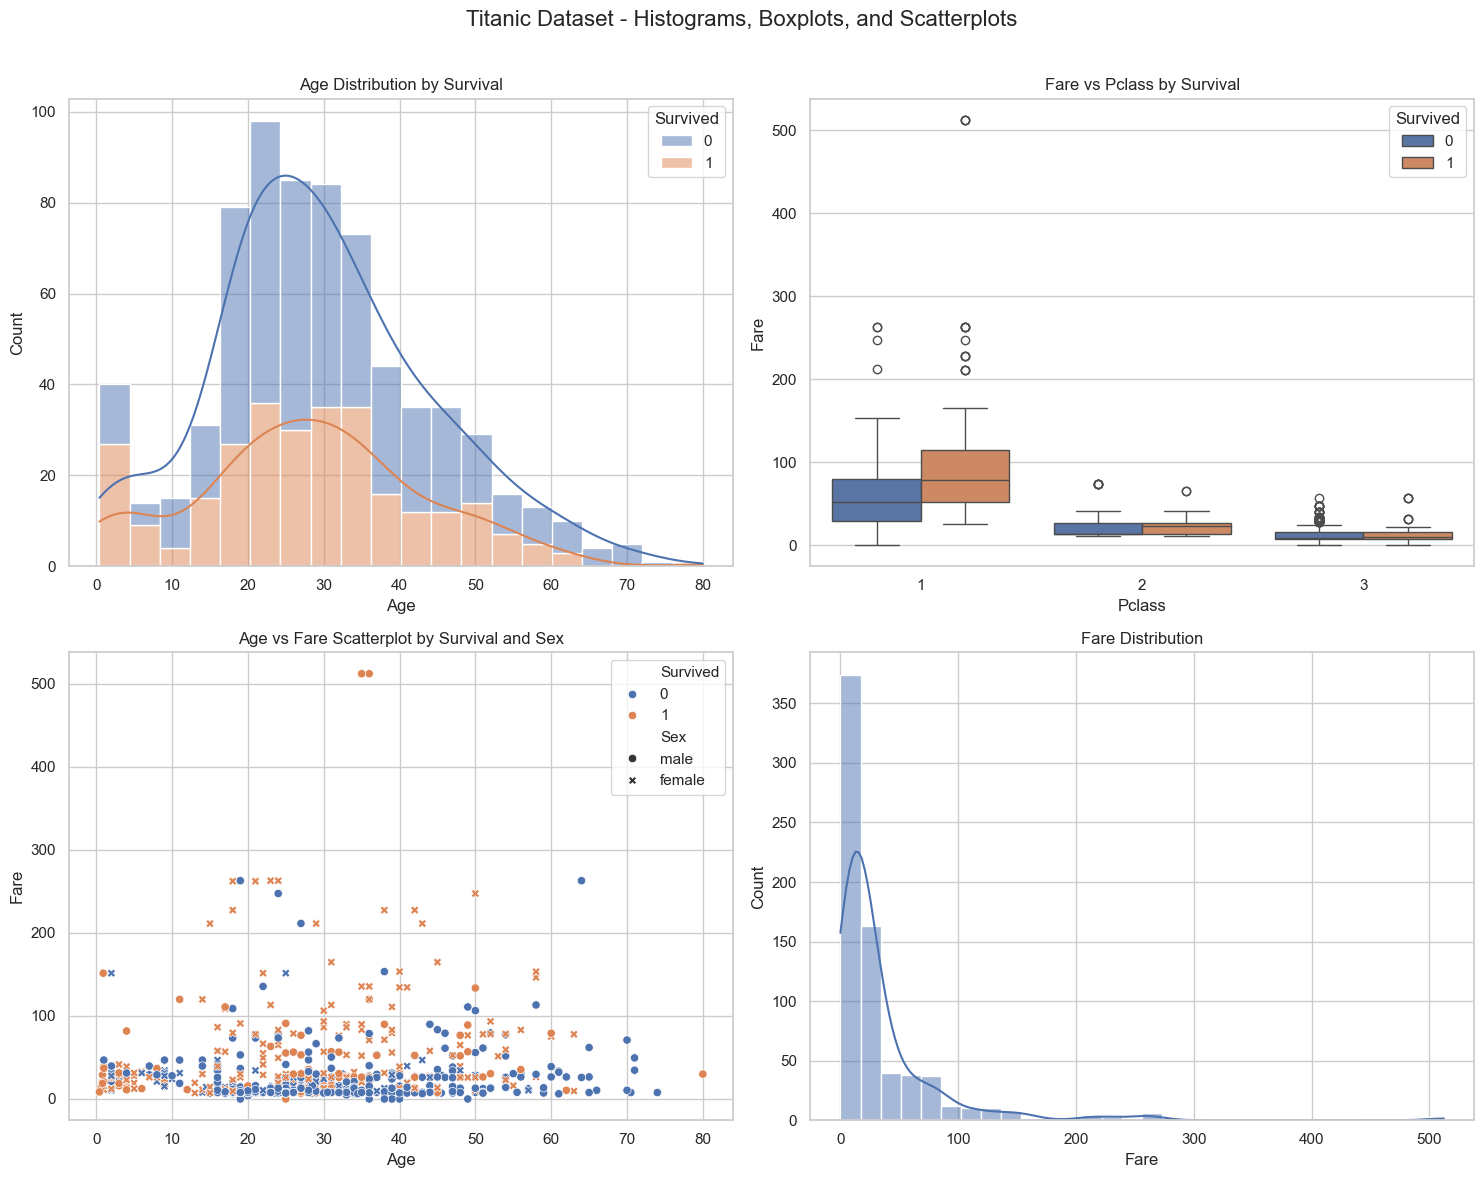

In [25]:
# Create all three types of plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Titanic Dataset - Histograms, Boxplots, and Scatterplots", fontsize=16)

# Histogram: Age distribution by survival
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution by Survival")

# Boxplot: Fare by Pclass and Survival
sns.boxplot(data=df, x="Pclass", y="Fare", hue="Survived", ax=axes[0, 1])
axes[0, 1].set_title("Fare vs Pclass by Survival")

# Scatterplot: Age vs Fare colored by Survived
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived", style="Sex", ax=axes[1, 0])
axes[1, 0].set_title("Age vs Fare Scatterplot by Survival and Sex")

# Histogram: Fare distribution
sns.histplot(data=df, x="Fare", bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Fare Distribution")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Step 10: Export Cleaned Data**

In [26]:
df.to_csv("Titanic_Cleaned.csv", index=False)